<a href="https://colab.research.google.com/github/noble752/nsysuhomework/blob/main/Final_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# 專案報告: 燒肉店客服機器人

## 專案背景與動機

### 專案背景  
隨著生成式 AI 技術的成熟，企業開始導入智能客服系統來提升顧客服務品質與營運效率。傳統餐飲業者面臨的挑戰包括人工客服資源有限、顧客等待時間長，以及預約、諮詢等流程缺乏即時回應機制。本專案旨在透過整合 Google Gemini API，打造一個智慧型客服機器人，模擬真實服務人員的對話方式，協助顧客瞭解餐廳資訊並進行訂位諮詢，提升顧客體驗，同時降低人力成本。

### 專案目標  
- 建置一個具備自然語言理解與應答能力的客服機器人，能清楚回答顧客關於餐廳的常見問題（如餐點內容、營業時間、預約方式等）  
- 模擬訂位對話流程，協助蒐集訂位相關資訊（如人數、時間、日期），提升服務互動的擬真度與實用性。  
- 提供清楚、親切且具備上下文邏輯的回應，讓顧客在無壓力的對話中獲得所需資訊。

## 系統設計與架構



### 系統功能分析  
| 功能項目          | 說明                                     |
| ------------- | -------------------------------------- |
| 使用者訊息接收       | 使用者透過 Gradio 介面輸入訊息，系統接收後進行處理          |
| Gemini API 連接 | 將使用者訊息送至 Google Gemini API，產生具邏輯性的客服回應 |
| 回應傳送          | 系統將 Gemini 回傳的內容以對話形式顯示於 Gradio 聊天框中   |
| 餐廳介紹展示        | 左側固定區塊顯示餐廳基本介紹與特色，協助使用者快速了解服務內容        |
| 模擬訂位流程        | 根據使用者輸入，引導其提供日期、人數、時間等資訊，模擬訂位情境        |



### 系統架構圖
[ 使用者 ]->
[ Gradio 前端界面（Web-based UI）]->
[ Python 應用程式邏輯 ](將輸入轉送至 Gemini API並接收回應並更新聊天記錄)->
[ Google Gemini API ]
（語意理解與客服對話生成）


### 使用的技術  
| 技術項目     | 說明                                                             |
| -------- | -------------------------------------------------------------- |
| 程式語言     | Python                                                         |
| 開發框架     | Gradio（用於建立 Web 對話介面）                                          |
| 語言模型 API | Google Gemini API（用於自然語言理解與生成）                                 |
| 前端互動介面   | Gradio Chatbot + Markdown 組合介面，實現對話與餐廳介紹內容並呈現                  |
| 部署方式     | 可於本地執行（Jupyter Notebook / Colab）或部署至雲端平台（如 Hugging Face Space） |
                      |


## 專案成果與效益

### 系統程式

In [ ]:
pip install -q gradio
import gradio as gr
from google import genai
from google.colab import userdata

api_key = userdata.get('GOOGLE_API_KEY')
client = genai.Client(api_key=api_key)

text = '''
### 燒肉店介紹

歡迎光臨「燒肉店」，這是一間結合傳統與現代風格的高品質燒肉餐廳，位於市中心熱鬧的商圈內。店內裝潢採用日式簡約風格，搭配溫暖燈光與包廂式座位，適合家庭聚餐、朋友聚會或情侶約會。

我們主打現點現烤的和牛燒肉套餐，選用來自日本與澳洲的高品質牛肉，肉質鮮嫩多汁。除了牛肉外，還有豐富的豬肉、雞肉、海鮮與素食選項，搭配自製的醬料與新鮮蔬菜，讓每一口都能感受到食材的原味與火烤的香氣。

餐廳提供多種套餐與單點選擇，並設有午間限定菜單與晚間特選料理。我們也提供免費Wi-Fi、桌邊服務與貼心的用餐時間提醒，讓您用餐無壓力。

我們歡迎線上與電話預約，目前可預約一週內的時段。若有特殊飲食需求或過敏資訊，請提前告知我們的服務人員。

快來燒肉店，體驗一場味覺的饗宴吧！
'''

prompt = f'''
你現在是一位專業的餐廳客服機器人，負責協助顧客了解我們的燒肉餐廳資訊，並處理與預約相關的詢問。你需要：

- 親切、有禮地回應客戶的問題
- 協助說明餐廳介紹內容，如營業資訊、餐點特色、座位安排、預約方式等
- 回答關於營業時間、套餐價格、用餐時間限制、是否可訂位等問題
- 若顧客想訂位，請先詢問日期、人數與時間（你不需真的登記，但可模擬對話）
- 提醒顧客如有過敏或特殊需求可提前告知
- 在對話結尾，可溫馨詢問是否還有其他可以協助的地方

請注意，你不需要照本宣科重複餐廳內容，而是根據顧客的問題來有針對性地說明與回覆。

以下是餐廳介紹：
{text}
'''

# 初始化 chat 並回傳開場訊息
def init_chat():
    chat = client.chats.create(model="gemini-2.0-flash")
    init_response = chat.send_message(prompt)
    return chat, [{"role": "assistant", "content": init_response.text}]

# 回應訊息的邏輯
def respond(message, history, chat):
    response = chat.send_message(message)
    history.append({"role": "user", "content": message})
    history.append({"role": "assistant", "content": response.text})
    return history, chat, ""

with gr.Blocks() as app:
    state = gr.State()  # 儲存 chat 對象
    with gr.Row():
        with gr.Column(scale=1):  # 左側：餐廳介紹
            gr.Markdown("## 餐廳介紹")
            gr.Markdown(text)
        with gr.Column(scale=2):  # 右側：對話介面
            chatbot = gr.Chatbot(label="燒肉店客服機器人", type="messages")
            msg = gr.Textbox(label="輸入您的訊息（如詢問餐點、訂位等）")

    def start():
        chat, init_messages = init_chat()
        return chat, init_messages

    # 初始化
    app.load(start, outputs=[state, chatbot])

    # 傳送訊息
    msg.submit(fn=respond, inputs=[msg, chatbot, state], outputs=[chatbot, state, msg])

app.launch()


### 系統畫面

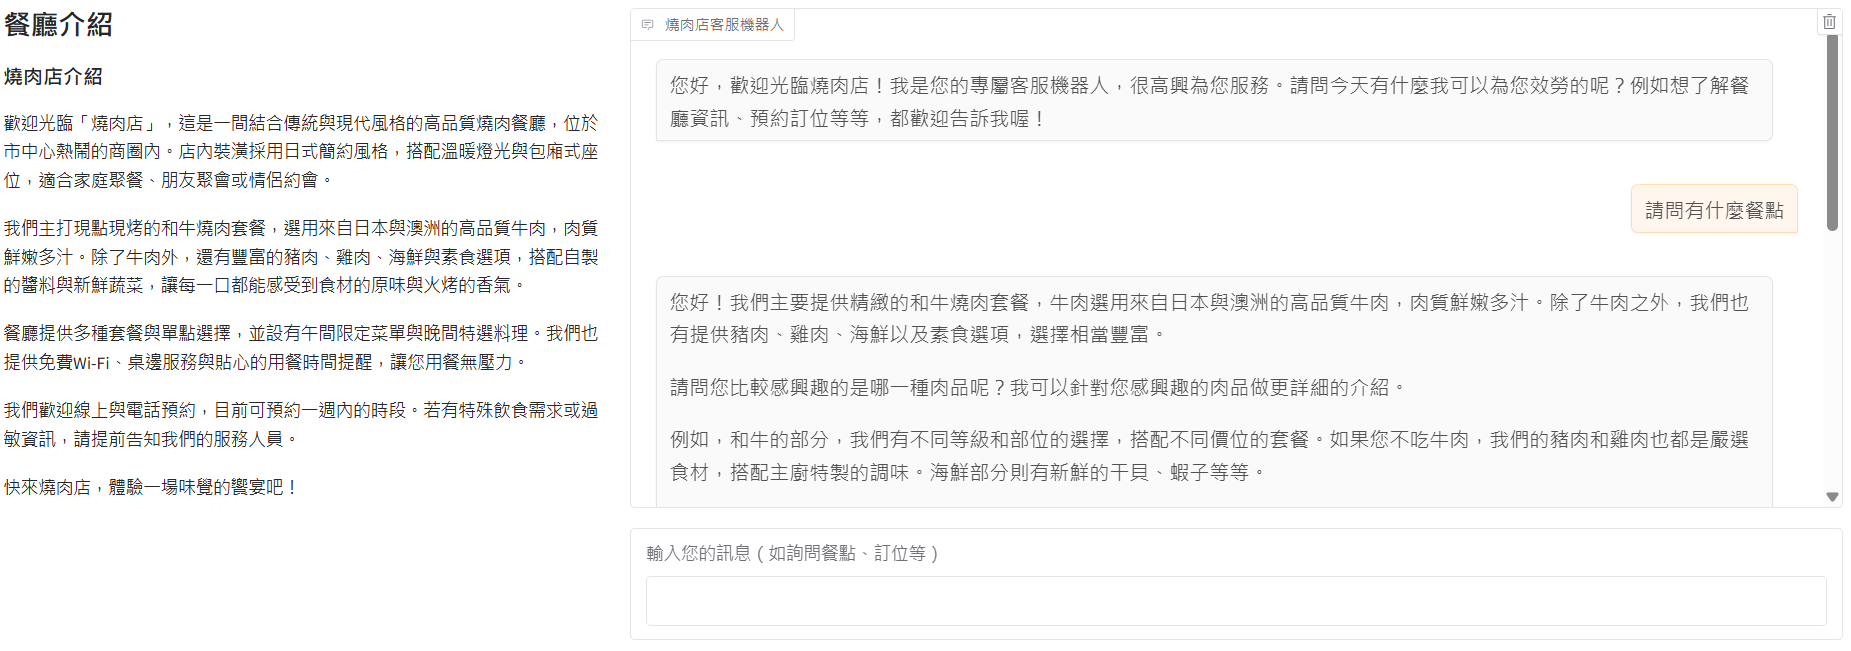
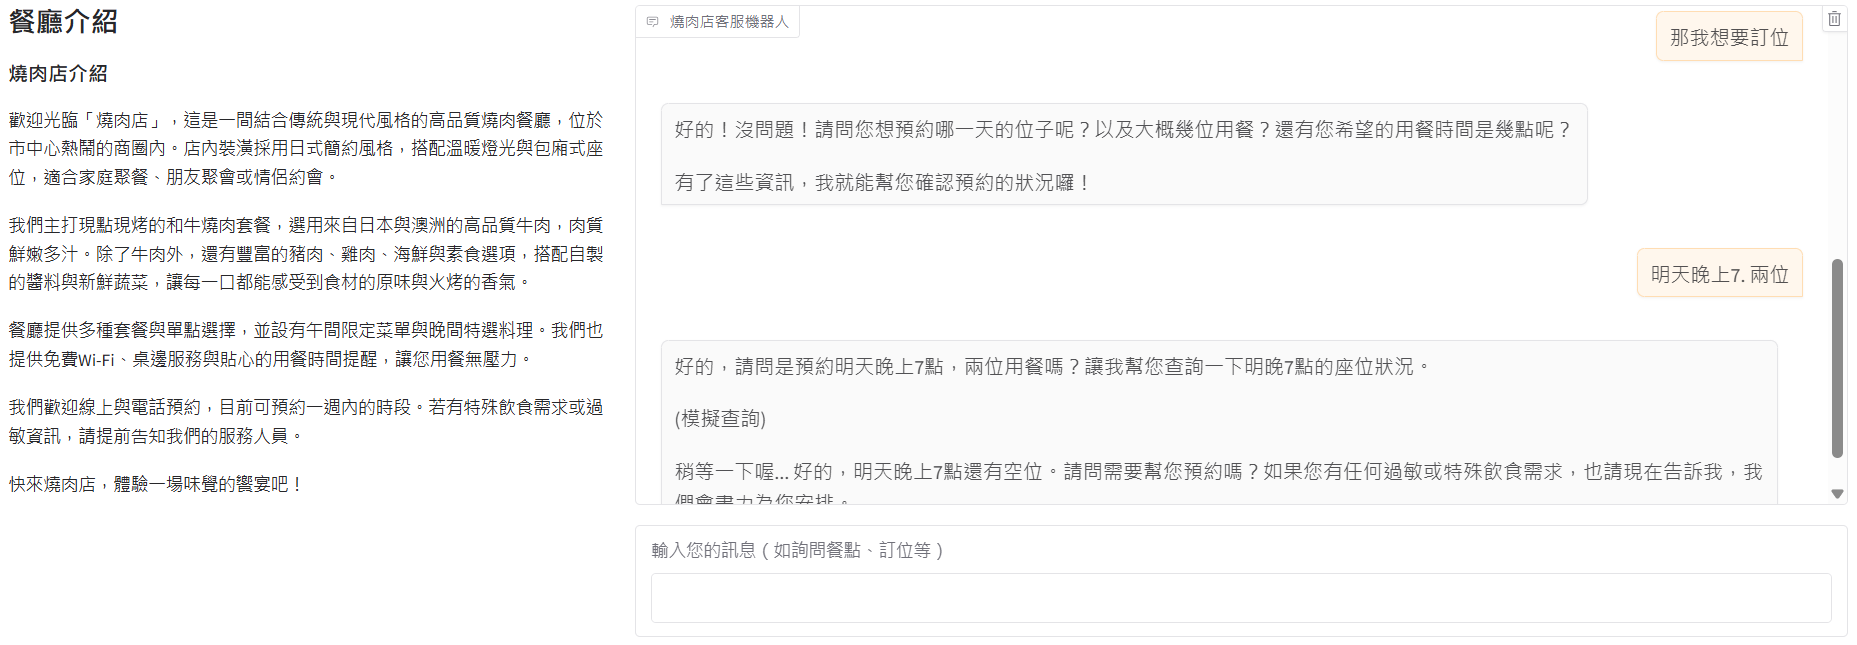

- 使用者於 對話方塊 傳送訊息：「請問有什麼餐點」  
- 客服機器人 回應：有提供什麼餐點並簡單介紹
- 使用者於 對話方塊 傳送訊息：「那我想要訂位」  
- 客服機器人 回應：詢問時間和人數
- 使用者於 對話方塊 傳送訊息：「明天晚上7.兩位」  
- 客服機器人 回應：訂位成功

### 效益分析

- 使用者測試報告(自己主觀認為)

| 測試項目   | 測試結果       | 備註                       |
| ------ | ---------- | ------------------------ |
| 功能完整性  | 90分     | 能正確回答多數顧客問題，訂位流程流暢       |
| 界面設計   | 70分     | 使用者認為 Gradio 介面簡單直覺、互動友善 |
| 性能表現   | 80分 | 回應速度可接受，少數情況下 API 稍有延遲   |
| 使用者滿意度 | 80分   | 使用者覺得客服對話自然，具備情境代入感      |
| 建議回饋   | 增加訂位確認功能   | 建議未來可串接真實訂位系統、自動發送確認     |

- 系統是否達到目標？  
是。系統成功讓使用者透過 Gradio 介面 與生成式 AI 互動，且 Gemini 回應具智慧與語意邏輯，符合預期成果。

## 未來發展與改進

### 改進建議  
- 新增常見問題分類選單，如：訂位資訊、菜單介紹、營業時間、優惠活動等，讓使用者快速獲取所需資訊  
- 優化訂位流程設計，引導使用者逐步輸入日期、時間、人數，並提供模擬確認回覆
- 加強錯誤處理與引導語，例如當使用者輸入不清楚時，提供建議格式或補充問題的提示

### 未來規劃  
- 整合外部訂位系統（如 inline、EZTABLE），使對話機器人可直接完成訂位並回傳確認資訊  
- 增加語音輸入與 TTS（文字轉語音）功能，滿足不同使用習慣的顧客需求  
- 支援圖片展示功能，可搭配餐點圖片或座位區介紹提升互動吸引力（如 Gemini 圖像生成支援）